In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [65]:
N = 100000
RATE = 2.0 # payloads per second
MEAN = int(1/RATE * 1000) # gap size in milliseconds

def plot(data):
    data = sorted(data)
    n = len(data)
    median = data[(n-1)//2] if n%2 else (data[n//2-1] + data[n//2]) / 2
    mean = sum(data)/n
    print(f"min: {data[0]:>4}  median: {median:>4}  mean: {mean:>4.3f}  max:{data[-1]}")
    sns.histplot(data, bins=30)

min:    0  median: 500.0  mean: 500.570  max:3500


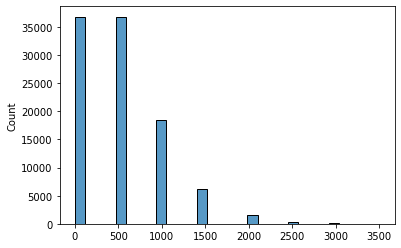

In [66]:
# Poisson - discrete, parameter = expected value of distribution (mean)
# mean values < 1 give heavy tail distributions (larger numbers to balance zeroes)
# mean values > 1 tend toward a normal distribution
# difficult to get smaller granularity (discrete)
gaps = np.random.poisson(1, N)
gaps *= MEAN
plot(gaps)

min: 0.17769374140280247  median: 390.6740613208452  mean: 450.915  max:2535.316400733386


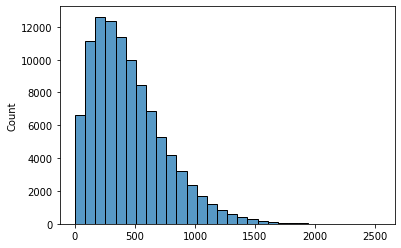

In [67]:
# Weibull - continuous, parameter = shape of distribution (k)
# used in ns-2 simulator
# shape of 1 = exponential distribution
# output mean tends toward 1 : gamma(1 + 1/k)
# can multiply by desired mean (scale)
gaps = np.random.weibull(1.5, N)
gaps *= MEAN
plot(gaps)

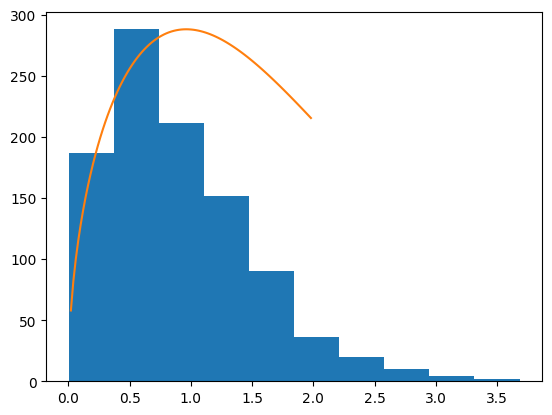

In [7]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1,100.)/50.
shape = 1.5
scale = 2.
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)
count, bins, ignored = plt.hist(np.random.weibull(shape, 1000))
x = np.arange(1,100.)/50.
s = count.max()/weib(x, scale, shape).max()
plt.plot(x, weib(x, scale, shape)*s)
plt.show()